# **EDA(Exploratory Data Analysis)<br>**
간단하게 Train, Test Dataset의 구조와 문장 분포를 확인해보았습니다.

**Import Package<br>**
데이터 확인을 위한 패키지 불러오기

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


os.chdir('/content/drive/MyDrive')
%run koreda.py
from koreda import random_deletion, random_swap

/content/drive/MyDrive/koreda.py:142: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]
/content/drive/MyDrive/koreda.py:142: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  words = [word for word in words if word is not ""]


**Load Data** <br>
Data가 위치한 PATH에서 Data를 불러오기

In [3]:
PATH =  '/content/drive/MyDrive'

train = pd.read_csv(os.path.join(PATH, 'train_data.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(PATH, 'test_data.csv'), encoding='utf-8')

train.head(5)

,index,premise,hypothesis,label
0,0,"씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...",씨름의 여자들의 놀이이다.,contradiction
1,1,"삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...",자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,"진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...",이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [4]:
test.head(5)

,index,premise,hypothesis,label
0,0,다만 조금 좁아서 케리어를 펼치기 불편합니다.,케리어를 펼치기에 공간이 충분했습니다.,answer
1,1,그리고 위치가 시먼역보다는 샤오난먼역에 가까워요,시먼역보다는 샤오난먼역에 먼저 도착할 수 있어요,answer
2,2,구구절절 설명하고 이해시키려는 노력이 큰 의미없이 다가온다.,무엇인가 말을 많이 하기는 했지만 큰 의미가 있지는 않았다.,answer
3,3,몇 번을 다시봐도 볼 때마다 가슴이 저민다.,다시 봤을때는 무덤덤했다.,answer
4,4,"8월 중에 입주신청을 하면 청년은 9월, 신혼부부는 10월부터 입주가 가능하다.",8월 중에 입주신청을 하면 신혼부부는 9월 부터 입주가 가능하다.,answer


**Train, Test Data 확인**

In [5]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1666 non-null   int64 
 1   premise     1666 non-null   object
 2   hypothesis  1666 non-null   object
 3   label       1666 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB
None


In [6]:
print(train.columns)
print(test.columns)

Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')
Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')


In [7]:
print('Train Null', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null', test.isnull().sum(), sep='\n')

Train Null
index         0
premise       0
hypothesis    0
label         0
dtype: int64

Test Null
index         0
premise       0
hypothesis    0
label         0
dtype: int64


In [8]:
print('Train', train['label'].value_counts(), end='\n\n')
print('Test', test['label'].value_counts())

Train label
entailment       8561
contradiction    8489
neutral          7948
Name: count, dtype: int64

Test label
answer    1666
Name: count, dtype: int64


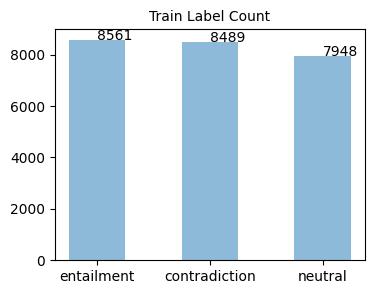

In [9]:
x = train['label'].value_counts().keys()
y = train['label'].value_counts().values
plt.figure(figsize=(4,3))
plt.title('Train Label Count', fontsize=10)

plt.bar(x, y, width = 0.5, alpha=0.5)
plt.text(x[0], y[0], s = y[0])
plt.text(x[1], y[1], s = y[1])
plt.text(x[2], y[2], s = y[2])


plt.show()

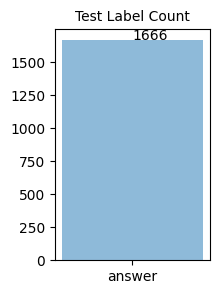

In [10]:
x = test['label'].value_counts().keys()
y = test['label'].value_counts().values
plt.figure(figsize=(2,3))
plt.title('Test Label Count', fontsize=10)

plt.bar(x, y, width = 0.5, alpha=0.5)
plt.text(x[0], y[0], s = y[0])

plt.show()

In [11]:
max_len = np.max(train['premise'].str.len())
min_len = np.min(train['premise'].str.len())
mean_len = np.mean(train['premise'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['hypothesis'].str.len())
min_len = np.min(train['hypothesis'].str.len())
mean_len = np.mean(train['hypothesis'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

Max Premise Length:  90
Min Premise Length:  19
Mean Premise Lenght:  45.406552524201935 

Max Hypothesis Length:  103
Min Hypothesis Length:  5
Mean Hypothesis Lenght:  24.924433954716378


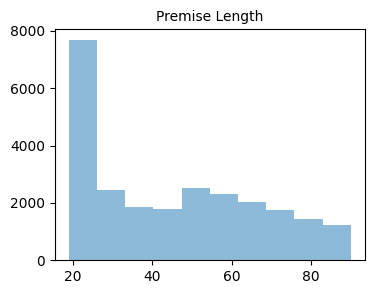

In [12]:
plt.figure(figsize=(4,3))
plt.title('Premise Length', fontsize=10)

plt.hist(train['premise'].str.len(), alpha=0.5)

plt.show()

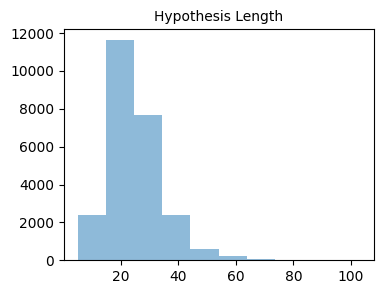

In [13]:
plt.figure(figsize=(4,3))
plt.title('Hypothesis Length', fontsize=10)

plt.hist(train['hypothesis'].str.len(), alpha=0.5)

plt.show()

**간단한 Test Preprocessing** <br>
전제, 가설에 존재하는 한글 단어가 아닌 다른 단어들은 전부 제거해줍니다.

In [14]:
train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '', regex=True) # ^ -> opposite
test['premise'] = test['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '', regex=True)
train.head(5)

,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다.,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다.,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다.,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.,neutral


In [15]:
train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '', regex=True)
test['hypothesis'] = test['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '', regex=True)
train.head(5)

,index,premise,hypothesis,label
0,0,씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서 소년이나 장정들이 ...,씨름의 여자들의 놀이이다,contradiction
1,1,삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나 ...,자작극을 벌인 이는 3명이다,contradiction
2,2,이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다,예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다,entailment
3,3,광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...,원주민들은 종합대책에 만족했다,neutral
4,4,진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면 이런 상황에서는 ...,이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다,neutral


# **Modeling** <br>
**transformers 다운로드, Import Package**


신경망 언어모델(Neural Language Models) 기반 딥러닝 라이브러리인 Hugging Face사의 🤗Transformers 라이브러리


In [16]:
!pip install transformers

In [17]:
import os
import random
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig

**Seed 고정, GPU 설정**

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

torch.manual_seed(777)

if device == "cuda:0":
    torch.cuda.manual_seed_all(777)

cpu


**Tokenizer, Model, Model Config 로드**

Hugging Face Hub에 존재하는 Pretrained Tokenizer와 Model 및 Model Config를 불러옵니다.

이 때, Classification은 num_labels가 2로 Default되어있기 때문에 Model Config의 Parameter를 변경해줍니다.

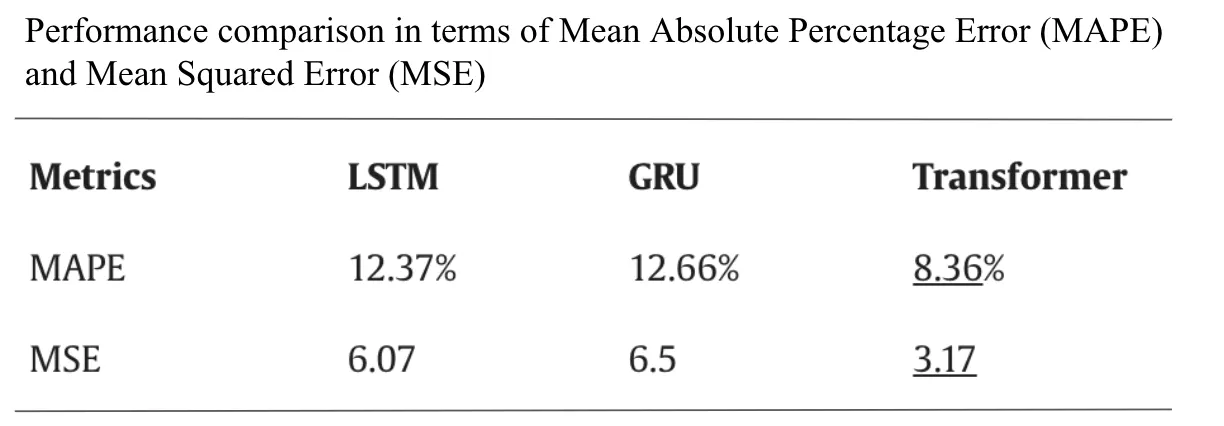

In [19]:
# klue_roberta_large

MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [20]:
print(config)

RobertaConfig {
  "_name_or_path": "klue/roberta-large",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "tokenizer_class": "BertTokenizer",
  "transformers_version": "4.42.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 32000
}



**Tokenizing**

Train Data를 Train과 Validation Dataset으로 나누고 각각 데이터를 Tokenizer를 통해 Tokenizing을 합니다.

Tokenizer에 들어가는 문장은 Premise와 Hypothesis을 Concat한 문장이 됩니다.

In [21]:
train_dataset, eval_dataset = train_test_split(train, test_size=0.2, shuffle=True, stratify=train['label']) # stratify -> 클래스 분포 비율 맞춰줌

In [22]:
train_dataset.head()

,index,premise,hypothesis,label
7832,7832,참여 희망 기업과 근로자는 누리집과 전담지원센터를 통해 더욱 자세한 내용을 확인할 ...,전담지원센터를 통해 참여 희망 기업은 더 자세한 내용을 확인할 수 있다,entailment
14378,14378,재방문시 다시 이용하고 싶은 좋은 숙소입니다,재방문한 숙소입니다,neutral
11289,11289,이탈리아묶은 숙소중 최고로 편안한 시설이였어요,이탈리아를 여행했어요,entailment
19965,19965,청소년 문제는 피해자구제보다 가해자 구제가 본질임을 망각한 힐링을 앞세운 이청미 띄...,청소년 문제는 피해자보다 가해자 구제가 본질이다,entailment
23888,23888,제주도에서의 생활이 유랑은 마냥 행복하고 즐겁기만 하다,유랑은 제주도 생활에 행복감을 느낀다,entailment


In [23]:
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19998 entries, 7832 to 5870
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       19998 non-null  int64 
 1   premise     19998 non-null  object
 2   hypothesis  19998 non-null  object
 3   label       19998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.2+ KB
None


In [24]:
print(train_dataset.iloc[0][:])

index                                                      7832
premise       참여 희망 기업과 근로자는 누리집과 전담지원센터를 통해 더욱 자세한 내용을 확인할 ...
hypothesis              전담지원센터를 통해 참여 희망 기업은 더 자세한 내용을 확인할 수 있다
label                                                entailment
Name: 7832, dtype: object


# **Data Augmentation**

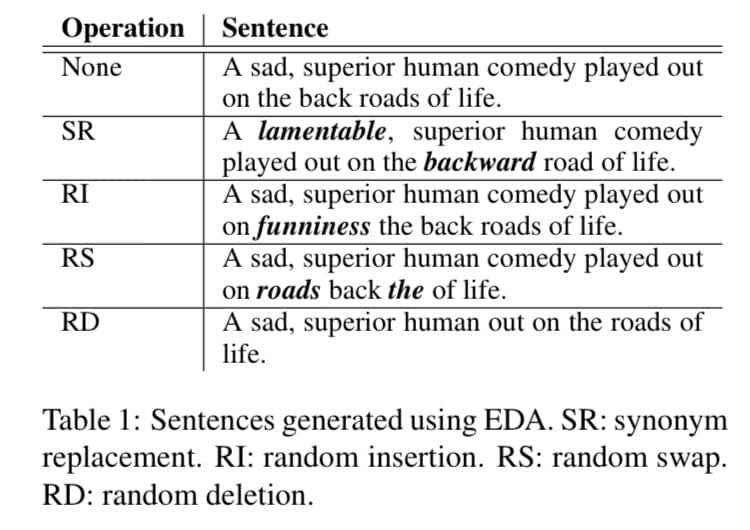

In [25]:
import transformers
import re
import random
import numpy as np


class BERT_Augmentation():
    def __init__(self):
        self.model_name = 'monologg/koelectra-base-v3-generator'
        self.model = transformers.AutoModelForMaskedLM.from_pretrained(self.model_name)
        self.tokenizer = transformers.AutoTokenizer.from_pretrained(self.model_name)
        self.unmasker = transformers.pipeline("fill-mask", model=self.model, tokenizer=self.tokenizer)
        random.seed(42)
    def random_masking_replacement(self, sentence, ratio=0.15):
        """Masking random eojeol of the sentence, and recover them using PLM.

        Args:
            sentence (str): Source sentence
            ratio (int): Ratio of masking

        Returns:
          str: Recovered sentence
        """

        span = int(round(len(sentence.split()) * ratio))

        # 품질 유지를 위해, 문장의 어절 수가 4 이하라면 원문장을 그대로 리턴합니다.
        if len(sentence.split()) <= 4:
            return sentence

        mask = self.tokenizer.mask_token
        unmasker = self.unmasker

        unmask_sentence = sentence
        # 처음과 끝 부분을 [MASK]로 치환 후 추론할 때의 품질이 좋지 않음.
        random_idx = random.randint(1, len(unmask_sentence.split()) - span)

        unmask_sentence = unmask_sentence.split()
        # del unmask_sentence[random_idx:random_idx+span]
        cache = []
        for _ in range(span):
            # 처음과 끝 부분을 [MASK]로 치환 후 추론할 때의 품질이 좋지 않음.
            while cache and random_idx in cache:
                random_idx = random.randint(1, len(unmask_sentence) - 2)
            cache.append(random_idx)
            unmask_sentence[random_idx] = mask
            unmask_sentence = unmasker(" ".join(unmask_sentence))[0]['sequence']
            unmask_sentence = unmask_sentence.split()
        unmask_sentence = " ".join(unmask_sentence)
        unmask_sentence = unmask_sentence.replace("  ", " ")

        return unmask_sentence.strip()

    def random_masking_insertion(self, sentence, ratio=0.15):

        span = int(round(len(sentence.split()) * ratio))
        mask = self.tokenizer.mask_token
        unmasker = self.unmasker

        # Recover
        unmask_sentence = sentence

        for _ in range(span):
            unmask_sentence = unmask_sentence.split()
            random_idx = random.randint(0, len(unmask_sentence)-1)
            unmask_sentence.insert(random_idx, mask)
            unmask_sentence = unmasker(" ".join(unmask_sentence))[0]['sequence']

        unmask_sentence = unmask_sentence.replace("  ", " ")

        return unmask_sentence.strip()

In [30]:
import pandas as pd
from tqdm import tqdm
import joblib

# BERT_Augmentation 클래스 인스턴스 생성
BERT_aug = BERT_Augmentation()
random_masking_insertion = BERT_aug.random_masking_insertion

# 원본 데이터 로드
orig_train = train_dataset

# 1401번째 행부터 2800번째 행까지 추출
subset_train = orig_train.iloc[1400:2800].copy()

# random insertion 적용 함수
def apply_random_masking_insertion(x, ratio=0.15):
    return random_masking_insertion(x, ratio=ratio)

# random insertion 데이터 증강
random_masking_insertion_train = subset_train.copy()

# 멀티프로세싱을 사용하여 빠르게 데이터 증강 수행
pool = joblib.Parallel(n_jobs=8, prefer='threads')
mapper = joblib.delayed(apply_random_masking_insertion)

# sentence1에 대해 random insertion 적용
tasks = [mapper(row) for i, row in random_masking_insertion_train['premise'].items()]
random_masking_insertion_train['premise'] = pool(tqdm(tasks))

# sentence2에 대해 random insertion 적용
tasks = [mapper(row) for i, row in random_masking_insertion_train['hypothesis'].items()]
random_masking_insertion_train['hypothesis'] = pool(tqdm(tasks))

# 증강된 1400개의 데이터를 df3에 대입
df3 = random_masking_insertion_train

config.json:   0%|          | 0.00/463 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/149M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

100%|██████████| 1400/1400 [01:16<00:00, 18.20it/s]


In [31]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 24927 to 18144
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1400 non-null   int64 
 1   premise     1400 non-null   object
 2   hypothesis  1400 non-null   object
 3   label       1400 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.7+ KB
None


wandb 이용 - 회원가입, api key 얻은 후 진행

In [34]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00


In [ ]:
import wandb
#초기화
wandb.init(project="kubig_klueroberta")

BERT_Augmentation, random masking replacement

In [ ]:
!git clone https://github.com/kyle-bong/K-TACC.git
%cd K-TACC

In [ ]:
import sys
sys.path.append('/content/K-TACC')

In [ ]:
!pip install -r requirements.txt

In [ ]:
import pandas as pd
from BERT_augmentation import BERT_Augmentation
from aeda import aeda
from tqdm import tqdm
from multiprocessing import Pool
import joblib
from functools import partial
import numpy as np
tqdm.pandas()

BERT_aug = BERT_Augmentation()
random_masking_replacement = BERT_aug.random_masking_replacement

def apply_random_masking_replacement(x, ratio=0.15):
    return random_masking_replacement(x, ratio=ratio)

In [ ]:
df2 = train.copy()
pool = joblib.Parallel(n_jobs=8, prefer='threads')
mapper = joblib.delayed(apply_random_masking_replacement)
tasks = [mapper(row) for i, row in df2['premise'].items()]
df2['premise'] = pool(tqdm(tasks))

In [ ]:
tasks = [mapper(row) for i, row in df2['hypothesis'].items()]
df2['hypothesis'] = pool(tqdm(tasks))

In [ ]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1400 non-null   int64 
 1   premise     1400 non-null   object
 2   hypothesis  1400 non-null   object
 3   label       1400 non-null   object
dtypes: int64(1), object(3)
memory usage: 43.9+ KB
None


In [ ]:
df1 = pd.DataFrame({'index' : [], 'premise' : [], 'hypothesis' : [],  'label' : []}) # Random Swap

i = 0
for index, row in train_dataset.iterrows():
  i += 1
  if i < 2801:
    continue
  elif i > 4200:
    break
  else:
    df1.loc[index] = [30000 + index," ".join(random_swap(row['premise'].split(), 1))," ".join(random_swap(row['hypothesis'].split(), 1)),row['label']]

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 2800 to 4199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1400 non-null   int64 
 1   premise     1400 non-null   object
 2   hypothesis  1400 non-null   object
 3   label       1400 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.7+ KB
None


In [ ]:
train_dataset = pd.concat([train_dataset, df1])
train_dataset = pd.concat([train_dataset, df2])
train_dataset = pd.concat([train_dataset, df3])

print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24198 entries, 0 to 1399
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   premise     24198 non-null  object
 1   hypothesis  24198 non-null  object
 2   label       24198 non-null  object
dtypes: object(3)
memory usage: 756.2+ KB
None


In [ ]:
tokenized_train = tokenizer(
    list(train_dataset['premise']),
    list(train_dataset['hypothesis']),
    return_tensors="pt",
    max_length=100, # Max Length = 190
    pad_to_max_length=True,
    truncation=True,
    add_special_tokens=True
)

In [ ]:
tokenized_eval = tokenizer(
    list(eval_dataset['premise']),
    list(eval_dataset['hypothesis']),
    return_tensors="pt",
    max_length=100,
    pad_to_max_length=True,
    truncation=True,
    add_special_tokens=True
)

In [ ]:
print(tokenized_train['input_ids'][1])
print(tokenizer.decode(tokenized_train['input_ids'][1]))

tensor([    0, 13067,  2170,  2318,  4123,  7786,   864,  2448,  1537,  2170,
         4123, 11018,  4013, 10135,  4344,   886,  2069,  6944,  2205,  2118,
         1380,  2886,  5209, 15151,  4123,  2073,  4311, 14112,  2496,  2259,
          575,  6233,  8175,  4538,     2, 13067,  2170,  2318,  4123,  7786,
          864,  2448,  1537,  2170,  4123, 11018,  2138,  6944,  2097,  2119,
        15151,  4123,  2073,  4311, 14112,  2496,  2259,   575,  6233,  8175,
         4538,     2,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1])
[CLS] 세입자에게 계약 만기 두달 전에 계약 해지 또는 임대료 인상 등을 통보하지 않았다면 임대차 계약은 그대로 갱신되는 것으로 간주한다 [SEP] 세입자에게 계약 만기 두달 전에 계약 해지를 통보해도 임대차 계약은 그대로 갱신되는 것으로 간주한다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, label):
        self.dataset = dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.dataset.items()}
        item['label'] = torch.tensor(self.label[idx])

        return item

    def __len__(self):
        return len(self.label)

In [ ]:
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer": 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])

    return num_label


train_label = label_to_num(train_dataset['label'].values)
print("train label", train_label[:10])
eval_label = label_to_num(eval_dataset['label'].values)
print("eval label", eval_label[:10])

train label [0, 1, 0, 1, 1, 0, 2, 1, 0, 1]
eval label [2, 2, 2, 0, 0, 0, 0, 0, 2, 2]


In [ ]:
train_dataset = CustomDataset(tokenized_train, train_label)
eval_dataset = CustomDataset(tokenized_eval, eval_label)

print("Training Dataset 길이 : ", train_dataset.__len__(), end='\n\n')
print("Training Dataset [GET_ITEM] : ", train_dataset.__getitem__(1000), end='\n\n')
print("Training Dataset DECODE [GET_ITEM] : ", tokenizer.decode(train_dataset.__getitem__(1000)['input_ids']))


Training Dataset 길이 :  24198

Training Dataset [GET_ITEM] :  {'input_ids': tensor([    0,  3906,  2259,  4881,  2118,  1380,  3683, 28686,  2016,  3712,
         2073,  3906,  4362,  2069, 23048,  4908,  2069,  1073,  2371,  2088,
         3906,  2170,  2259,  4424,  1882,  2434,  2015,  2133,  2052,  3712,
         2031,  2170,  2318,  5998,  4514,  2052,  9735,  3254,  2219,  3606,
            2,  3712,  2031,  2073,  3983,  4514,  2069,  6083,  2118,  1380,
         2886,  2219,  3606,     2,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

# **Train & Evaluation**

In [ ]:
def compute_metrics(pred): # 모델의 성능 평가를 위해 사용되는 메소드 또는 함수. 평가 지표를 계산하는 방식을 정의한다.
  """ validation을 위한 metrics function """
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  probs = pred.predictions

  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

  return {
      'accuracy': acc,
  }

In [ ]:
training_ars = TrainingArguments(
    output_dir='./result', # 학습 결과물을 저장할 디렉토리를 지정한다.
    num_train_epochs=2, # 학습 에폭 수를 지정한다.
    per_device_train_batch_size=32, # 각 디바이스당 학습 배치 크기를 지정한다.
    save_total_limit=5,
    save_steps=500, # 일정한 스텝마다 모델 가중치를 저장하는 주기를 지정한다.
    evaluation_strategy='steps', # 매 eval_steps마다 평가
    eval_steps = 500,
    logging_steps=500, # 일정한 스텝마다 로깅을 수행하는 주기
    load_best_model_at_end = True
)

trainer = Trainer( # PyTorch와 같은 딥러닝 프레임워크에서 모델을 학습하기 위한 편리한 인터페이스를 제공하는 파이썬 라이브러리
    model=model, # = AutoModelForSequenceClassification.from_pretrained('klue/roberta-large', config=AutoConfig.from_pretrained('klue/roberta-large'))
    args=training_ars, # 학습 설정을 담고 있는 TrainingArguments 객체. 학습에 관련된 설정들을 조정하고 제어하는데 사용된다.
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer, # 모델의 토크나이저(tokenizer) 객체. 텍스트 데이터를 모델이 이해할 수 있는 형태로 변환하는데 사용된다.
    compute_metrics=compute_metrics,
)


In [ ]:
trainer.train()
model.save_pretrained('./result/best_model')

Step,Training Loss,Validation Loss,Accuracy
500,0.569200,0.418372,0.855000
1000,0.311400,0.346628,0.890800
1500,0.176000,0.333480,0.901400


# **Test**

In [ ]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['premise']),
    list(test['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = CustomDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(1))
print(tokenizer.decode(test_dataset.__getitem__(1)['input_ids']))

4
{'input_ids': tensor([    0,  4442,   864,  8023, 10524,  2052, 29599, 15116, 28674,    18,
        10963,  2119,  3614,  2062,    18,     2,   864,  8023, 10524,  2073,
         4316,  2116,  1233, 28588,  2359,  2062,    18,     2,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'label': tensor(1)}
[CLS] 요즘 두바이 초콜릿이 품절 대란이다. 난리도 아니다. [SEP] 두바이 초콜릿은 인기가 사그러들었다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)

pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

100%|██████████| 4/4 [00:00<00:00, 20.68it/s]

[2, 1, 2, 1]


In [ ]:
output_prob_df = pd.DataFrame(data = output_prob, columns = ['entailment','contradiction','neutral']) #각 label값 별 확률 dataframe

In [ ]:
output_prob_df.to_csv('./result/output_prob_df_robert.csv', index=False)

In [ ]:
def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])

    return str_label

answer = num_to_label(pred_answer)
print(answer)

[[0, 'neutral'], [1, 'contradiction'], [2, 'neutral'], [3, 'contradiction']]


In [ ]:
df = pd.DataFrame(answer, columns=['index', 'label'])

print(df)

   index          label
0      0        neutral
1      1  contradiction
2      2        neutral
3      3  contradiction


In [ ]:
df.to_csv('./result/submission.csv', index=False)